In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import glob

In [4]:
df = pd.read_csv('../digital_wallet_transactions.csv')

In [5]:
df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,19-08-2023 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,19-08-2023 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,19-08-2023 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,19-08-2023 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,19-08-2023 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [6]:
df.index = df['idx']
df.drop(columns='idx', inplace = True)

In [8]:
df.dtypes

transaction_id         object
user_id                object
transaction_date       object
product_category       object
product_name           object
merchant_name          object
product_amount        float64
transaction_fee       float64
cashback              float64
loyalty_points          int64
payment_method         object
transaction_status     object
merchant_id            object
device_type            object
location               object
dtype: object

In [9]:
df.isnull().sum()

transaction_id        0
user_id               0
transaction_date      0
product_category      0
product_name          0
merchant_name         0
product_amount        0
transaction_fee       0
cashback              0
loyalty_points        0
payment_method        0
transaction_status    0
merchant_id           0
device_type           0
location              0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [14]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [38]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y %H:%M')

In [30]:
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['hour'] = df['transaction_date'].dt.hour
df['weekday'] = df['transaction_date'].dt.day_name()

In [20]:
df['net_amount'] = df['product_amount'] - df['cashback']

In [21]:
df['is_high_value'] = df['product_amount'] > 5000

In [39]:
df.head()

,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,...,merchant_id,device_type,location,net_amount,is_high_value,year,month,day,hour,weekday
idx,,,,,,,,,,,,,,,,,,,,,
1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,...,MERCH_0083,iOS,Urban,1506.20,False,2023,8,19,3,Saturday
2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,...,MERCH_0163,iOS,Urban,1405.41,False,2023,8,19,4,Saturday
3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,...,MERCH_0320,iOS,Urban,1172.01,False,2023,8,19,5,Saturday
4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,...,MERCH_0194,Android,Urban,9120.39,True,2023,8,19,6,Saturday
5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,...,MERCH_0504,Android,Urban,3060.11,False,2023,8,19,6,Saturday


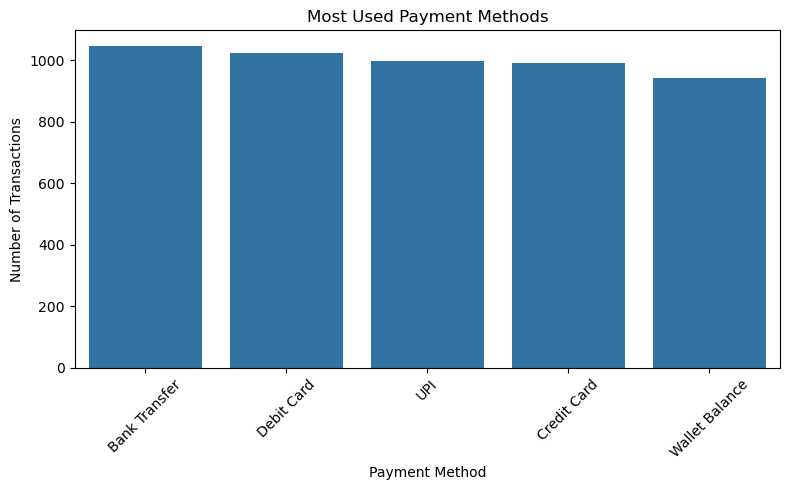

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_method', order=df['payment_method'].value_counts().index)
plt.title("Most Used Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

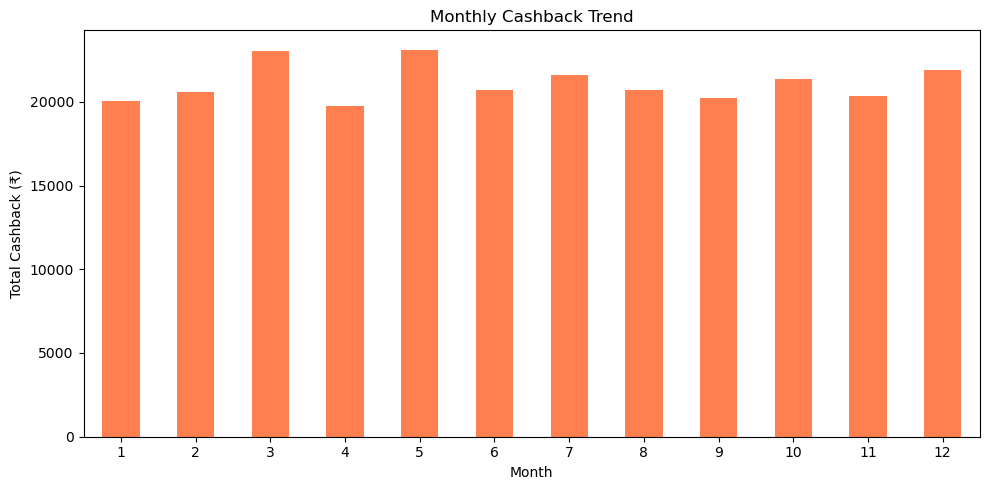

In [32]:
plt.figure(figsize=(10, 5))
df.groupby('month')['cashback'].sum().plot(kind='bar', color='coral')
plt.title("Monthly Cashback Trend")
plt.xlabel("Month")
plt.ylabel("Total Cashback (₹)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

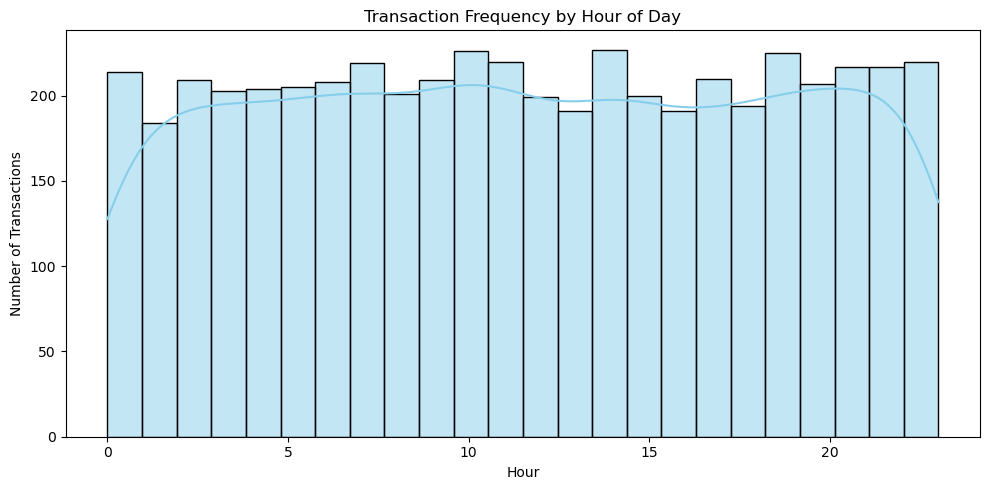

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'], bins=24, kde=True, color='skyblue')
plt.title("Transaction Frequency by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_31780\1674152066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="Blues_d")


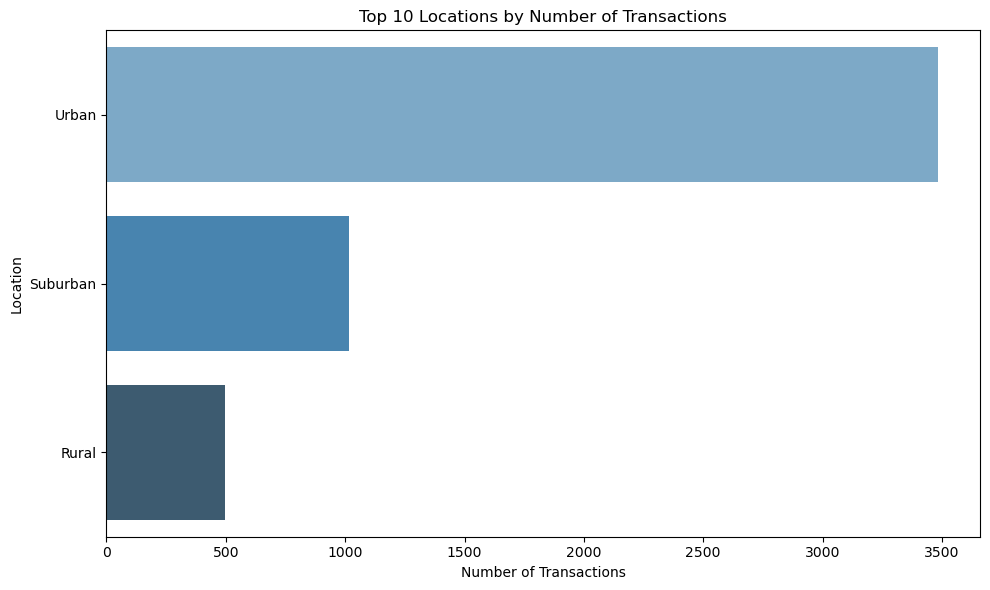

In [34]:
plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="Blues_d")
plt.title("Top 10 Locations by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

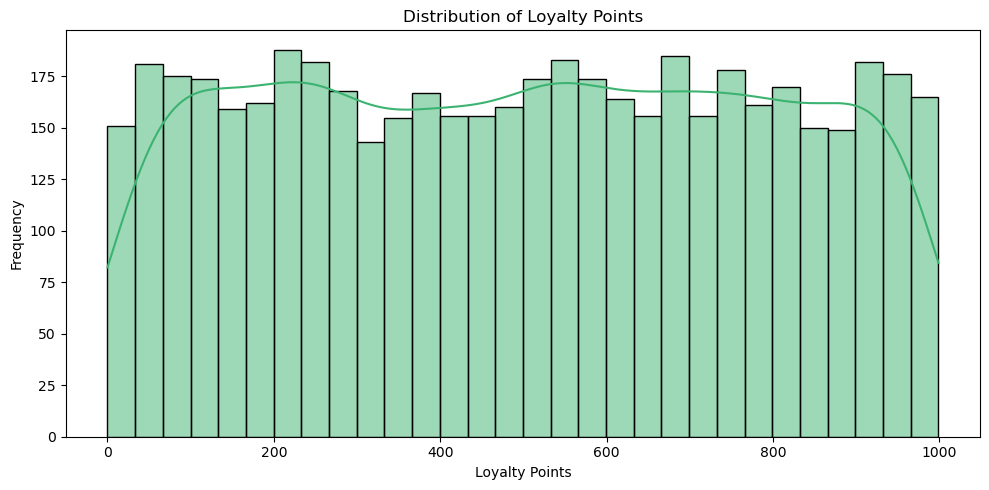

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df['loyalty_points'], bins=30, color='mediumseagreen', kde=True)
plt.title("Distribution of Loyalty Points")
plt.xlabel("Loyalty Points")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [40]:
df.to_csv("cleaned_wallet_data.csv", index=False)

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby('month')['cashback'].sum().plot(kind='bar', color='coral')
plt.title("Monthly Cashback Trend")
plt.xlabel("Month")
plt.ylabel("Total Cashback (₹)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_date', 'product_category',
       'product_name', 'merchant_name', 'product_amount', 'transaction_fee',
       'cashback', 'loyalty_points', 'payment_method', 'transaction_status',
       'merchant_id', 'device_type', 'location', 'net_amount', 'is_high_value',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')